# Modul 5

In [7]:
# Moh. Khairul Umam - 202310370311448


from functools import reduce

# ==================== PURE VALIDATION FUNCTIONS (dari Modul 2) ====================

def validate_non_empty_string(text):
    """Validasi string tidak kosong"""
    return len(text.strip()) > 0

def validate_password_length(password, min_length=3):
    """Validasi panjang password"""
    return len(password) >= min_length

def validate_menu_choice(choice, max_choice):
    """Validasi pilihan menu"""
    try:
        choice_int = int(choice)
        return 1 <= choice_int <= max_choice
    except ValueError:
        return False

def validate_index_range(index_str, list_length):
    """Validasi index dalam range list"""
    try:
        index = int(index_str) - 1
        return 0 <= index < list_length
    except ValueError:
        return False

def validate_password_min3(password):
    """Validasi password minimal 3 karakter"""
    return validate_password_length(password, min_length=3)



def validate_film_index_closure(list_length):
    """Factory function: membuat closure untuk validasi index film"""
    def validate_index(index_str):
        return validate_index_range(index_str, list_length)
    return validate_index




# ==================== PURE BUSINESS LOGIC FUNCTIONS (dari Modul 2) ====================

def check_credentials(username, password, accounts_dict):
    """Cek kredensial login"""
    return username in accounts_dict and accounts_dict[username] == password

def create_new_account(accounts, profiles, films, username, password, profile_data):
    """Membuat akun baru"""
    new_accounts = {**accounts, username: password}
    new_profiles = {**profiles, username: profile_data}
    new_films = {**films, username: []}
    return new_accounts, new_profiles, new_films

def add_film_to_collection(films_dict, username, film_title):
    """Tambah film ke koleksi user"""
    current_films = films_dict.get(username, [])
    new_films_list = current_films + [film_title]
    return {**films_dict, username: new_films_list}

def get_user_films(films_dict, username):
    """Ambil daftar film user"""
    return films_dict.get(username, [])

def update_film_at_index(films_dict, username, index, new_title):
    """Update film di index tertentu"""
    films_list = films_dict.get(username, [])
    
    if not films_list:
        return False, films_dict, "Tidak ada film untuk diubah"
    
    if not (0 <= index < len(films_list)):
        return False, films_dict, "Index tidak valid"
    
    new_films_list = films_list[:index] + [new_title] + films_list[index+1:]
    new_films_dict = {**films_dict, username: new_films_list}
    return True, new_films_dict, f"Film berhasil diubah menjadi: {new_title}"

def delete_film_at_index(films_dict, username, index):
    """Hapus film di index tertentu"""
    films_list = films_dict.get(username, [])
    
    if not films_list:
        return False, films_dict, None, "Tidak ada film untuk dihapus"
    
    if not (0 <= index < len(films_list)):
        return False, films_dict, None, "Index tidak valid"
    
    deleted_film = films_list[index]
    new_films_list = films_list[:index] + films_list[index+1:]
    new_films_dict = {**films_dict, username: new_films_list}
    return True, new_films_dict, deleted_film, f"Film '{deleted_film}' berhasil dihapus"

def format_film_list(films_list):
    if not films_list:
        return ["Belum ada film dalam koleksi"]
    
    return [f"  {idx+1}. {film}" for idx, film in enumerate(films_list)]

def check_username_exists(accounts_dict, username):
    return username in accounts_dict

def get_profile_info(profiles_dict, username):
    return profiles_dict.get(username, None)


# ==================== FITUR BARU MODUL 3: PROCESSING DATA SEQUENCE ====================

# === 1. LIST COMPREHENSION ===

def search_films_by_keyword(films_dict, username, keyword):
    films_list = films_dict.get(username, [])
    keyword_lower = keyword.lower()
    return [film for film in films_list if keyword_lower in film.lower()]


def get_film_lengths(films_dict, username):
    films_list = films_dict.get(username, [])
    return [(film, len(film)) for film in films_list]


# === 2. MAP ===

def to_uppercase(text):
    return text.upper()

def to_lowercase(text):
    return text.lower()

def add_prefix(text):
    return f"[FILM] {text}"


def transform_films(films_dict, username, transform_function):
    """Transform semua film menggunakan map"""
    films_list = films_dict.get(username, [])
    return list(map(transform_function, films_list))


# === 3. FILTER ===

def is_short_title(title):
    """Cek apakah judul pendek (kurang dari 10 karakter)"""
    return len(title) < 10

def is_long_title(title):
    """Cek apakah judul panjang (10 karakter atau lebih)"""
    return len(title) >= 10

def contains_word(word):
    """Membuat fungsi filter untuk kata tertentu"""
    def checker(title):
        return word.lower() in title.lower()
    return checker


def filter_films_by_condition(films_dict, username, condition_function):
    """Filter film berdasarkan kondisi menggunakan filter"""
    films_list = films_dict.get(username, [])
    return list(filter(condition_function, films_list))


# === 4. REDUCE ===

def sum_numbers(a, b):
    """Menjumlahkan dua angka"""
    return a + b

def count_items(total, item):
    """Menghitung jumlah item"""
    return total + 1

def concat_strings(a, b):
    """Menggabungkan dua string"""
    return f"{a}, {b}"


def calculate_total_length(films_dict, username):
    """Hitung total panjang semua judul film menggunakan reduce"""
    films_list = films_dict.get(username, [])
    if not films_list:
        return 0
    film_lengths = [len(film) for film in films_list]
    return reduce(sum_numbers, film_lengths, 0)


def count_films_with_reduce(films_dict, username):
    """Hitung jumlah film menggunakan reduce"""
    films_list = films_dict.get(username, [])
    if not films_list:
        return 0
    
    return reduce(count_items, films_list, 0)


def get_all_films_string(films_dict, username):
    """Gabungkan semua film menjadi satu string menggunakan reduce"""
    films_list = films_dict.get(username, [])
    if not films_list:
        return "Tidak ada film"
    
    if len(films_list) == 1:
        return films_list[0]
    
    return reduce(concat_strings, films_list)


# === 5. REKURSIF ===

def count_films_recursive(films_list):
    # Base case: list kosong
    if not films_list:
        return 0
    # Recursive case: 1 + count sisa list
    return 1 + count_films_recursive(films_list[1:])


def find_film_recursive(films_list, keyword, index=0):
    # Base case: sudah sampai akhir list
    if index >= len(films_list):
        return None
    
    # Base case: keyword ditemukan
    if keyword.lower() in films_list[index].lower():
        return (index, films_list[index])
    
    # Recursive case: cari di index berikutnya
    return find_film_recursive(films_list, keyword, index + 1)


def get_longest_title_recursive(films_list):
    # Base case: list kosong
    if not films_list:
        return None
    
    # Base case: hanya 1 film
    if len(films_list) == 1:
        return films_list[0]
    
    # Recursive case: compare first dengan longest dari rest
    first = films_list[0]
    longest_rest = get_longest_title_recursive(films_list[1:])
    
    # Return yang lebih panjang
    return first if len(first) >= len(longest_rest) else longest_rest


def reverse_films_recursive(films_list):
    # Base case: list kosong atau 1 elemen
    if len(films_list) <= 1:
        return films_list
    
    # Recursive case: reverse sisa + elemen pertama
    return reverse_films_recursive(films_list[1:]) + [films_list[0]]


# ==================== STATISTIK LANJUTAN dengan MAP, FILTER, REDUCE ====================

def get_films_statistics(films_dict, username):
    films_list = films_dict.get(username, [])
    
    if not films_list:
        return {
            'total_films': 0,
            'total_characters': 0,
            'average_length': 0,
            'shortest_film': None,
            'longest_film': None,
            'films_uppercase': [],
            'short_films': [],
            'long_films': []
        }
    
    total_chars = reduce(sum_numbers, [len(film) for film in films_list], 0)
    films_upper = list(map(to_uppercase, films_list))
    short_films = list(filter(is_short_title, films_list))
    long_films = list(filter(is_long_title, films_list))
    longest = get_longest_title_recursive(films_list)
    shortest = min(films_list, key=len) if films_list else None
    
    return {
        'total_films': len(films_list),
        'total_characters': total_chars,
        'average_length': total_chars / len(films_list) if films_list else 0,
        'shortest_film': shortest,
        'longest_film': longest,
        'films_uppercase': films_upper,
        'short_films': short_films,
        'long_films': long_films
    }

## Studi Kasus: Platform Koleksi Film
Untuk memenuhi tugas visualisasi data pada studi kasus _streaming catalog_ yang sudah dikerjakan sejak Modul 1 hingga Modul 4, saya membuat ringkasan data fiktif mengenai 10 member aktif. Data ini memuat karakteristik paket langganan, preferensi genre, hingga kebiasaan menonton sebagai dasar analisis.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.facecolor"] = "#f8f9fb"


In [9]:
streaming_data = {
    "Member": [
        "Alfi",
        "Nadia",
        "Bima",
        "Sinta",
        "Arya",
        "Maya",
        "Rico",
        "Putri",
        "Laras",
        "Andra",
    ],
    "Plan": [
        "Basic Duo",
        "Premium",
        "Premium",
        "Family",
        "Basic Duo",
        "Student",
        "Premium",
        "Family",
        "Student",
        "Family",
    ],
    "FavoriteGenre": [
        "Sci-Fi",
        "Romance",
        "Action",
        "Drama",
        "Documentary",
        "Thriller",
        "Comedy",
        "Action",
        "Sci-Fi",
        "Drama",
    ],
    "WeeklyWatchHours": [8, 11, 13, 10, 6, 9, 12, 7, 5, 14],
    "MoviesCompleted": [3, 6, 9, 7, 4, 5, 8, 4, 3, 10],
    "AvgRatingGiven": [4.3, 4.6, 4.1, 4.8, 4.2, 4.5, 3.9, 4.0, 4.4, 4.7],
    "PrimaryDevice": [
        "Mobile",
        "TV",
        "TV",
        "Tablet",
        "Mobile",
        "Mobile",
        "TV",
        "Tablet",
        "Mobile",
        "TV",
    ],
    "CustomerSegment": [
        "Mahasiswa",
        "Karyawan",
        "Karyawan",
        "Karyawan",
        "Mahasiswa",
        "Mahasiswa",
        "Freelancer",
        "Karyawan",
        "Mahasiswa",
        "Karyawan",
    ],
}

df_streaming = pd.DataFrame(streaming_data)
df_streaming


,Member,Plan,FavoriteGenre,WeeklyWatchHours,MoviesCompleted,AvgRatingGiven,PrimaryDevice,CustomerSegment
0,Alfi,Basic Duo,Sci-Fi,8,3,4.3,Mobile,Mahasiswa
1,Nadia,Premium,Romance,11,6,4.6,TV,Karyawan
2,Bima,Premium,Action,13,9,4.1,TV,Karyawan
3,Sinta,Family,Drama,10,7,4.8,Tablet,Karyawan
4,Arya,Basic Duo,Documentary,6,4,4.2,Mobile,Mahasiswa
5,Maya,Student,Thriller,9,5,4.5,Mobile,Mahasiswa
6,Rico,Premium,Comedy,12,8,3.9,TV,Freelancer
7,Putri,Family,Action,7,4,4.0,Tablet,Karyawan
8,Laras,Student,Sci-Fi,5,3,4.4,Mobile,Mahasiswa
9,Andra,Family,Drama,14,10,4.7,TV,Karyawan


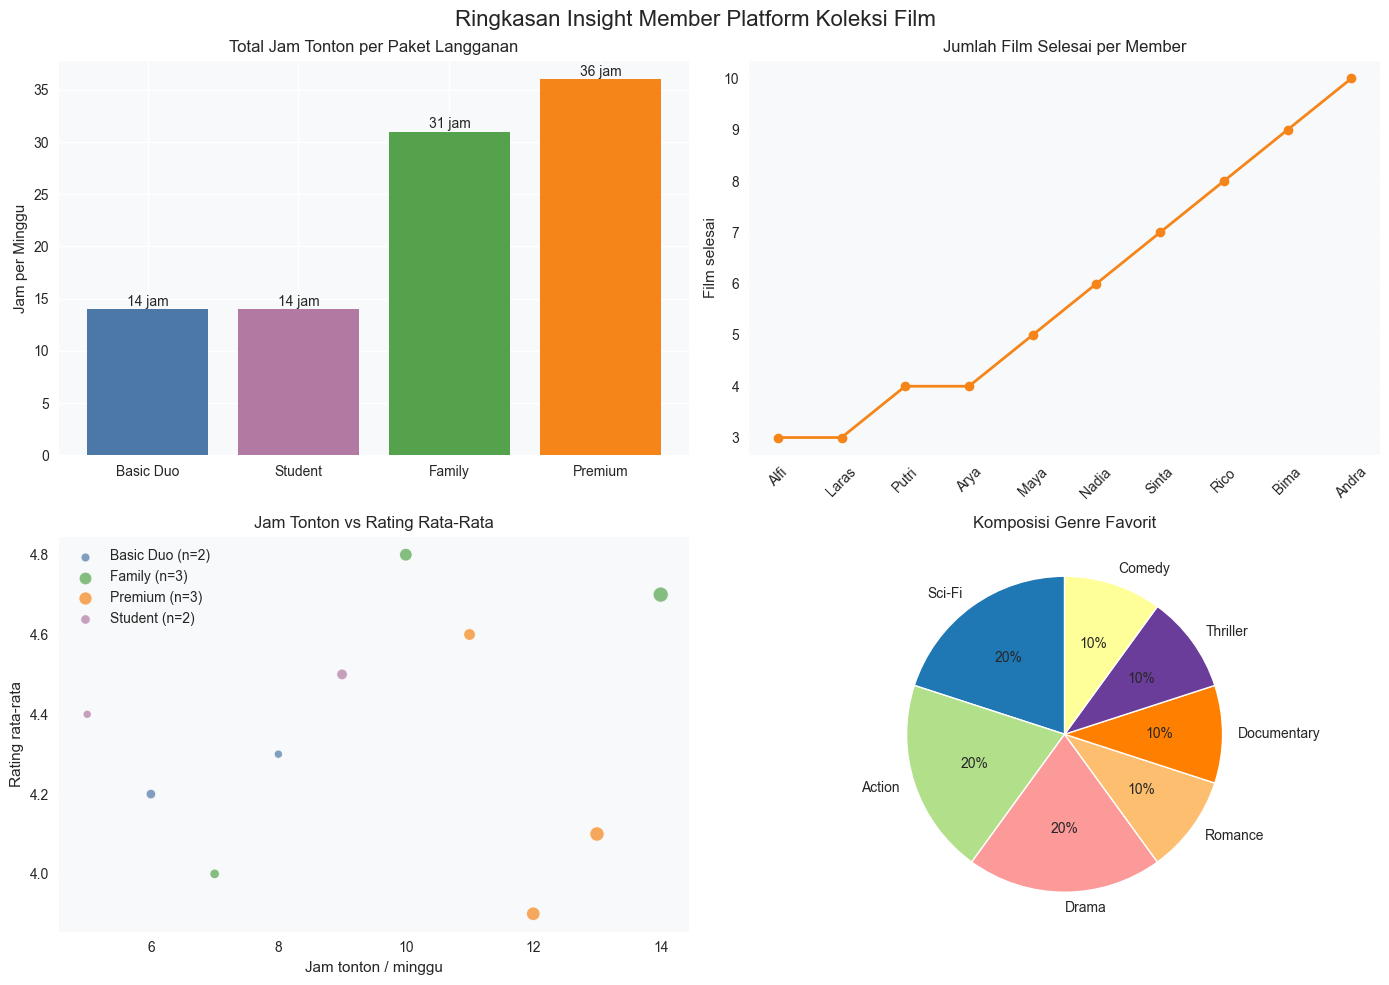

In [10]:
plan_hours = df_streaming.groupby("Plan")["WeeklyWatchHours"].sum().sort_values()
genre_counts = df_streaming["FavoriteGenre"].value_counts()
sorted_movies = df_streaming.sort_values("MoviesCompleted")
color_map = {
    "Basic Duo": "#4C78A8",
    "Premium": "#F58518",
    "Family": "#54A24B",
    "Student": "#B279A2",
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar chart: total jam tonton per paket
axes[0, 0].bar(plan_hours.index, plan_hours.values, color=[color_map[p] for p in plan_hours.index])
axes[0, 0].set_title("Total Jam Tonton per Paket Langganan")
axes[0, 0].set_ylabel("Jam per Minggu")
for idx, value in enumerate(plan_hours.values):
    axes[0, 0].text(idx, value + 0.3, f"{value} jam", ha="center", fontsize=10)

# Line plot: produktivitas member berdasarkan film selesai
axes[0, 1].plot(
    sorted_movies["Member"],
    sorted_movies["MoviesCompleted"],
    marker="o",
    color="#F58518",
    linewidth=2,
)
axes[0, 1].set_title("Jumlah Film Selesai per Member")
axes[0, 1].set_ylabel("Film selesai")
axes[0, 1].tick_params(axis="x", rotation=45)
axes[0, 1].grid(True, linestyle="--", alpha=0.4)

# Scatter plot: korelasi jam tonton vs rating
for plan, group in df_streaming.groupby("Plan"):
    axes[1, 0].scatter(
        group["WeeklyWatchHours"],
        group["AvgRatingGiven"],
        s=group["MoviesCompleted"] * 12,
        alpha=0.7,
        label=f"{plan} (n={len(group)})",
        color=color_map.get(plan, "#bab0ab"),
        edgecolor="white",
        linewidth=0.8,
    )
axes[1, 0].set_title("Jam Tonton vs Rating Rata-Rata")
axes[1, 0].set_xlabel("Jam tonton / minggu")
axes[1, 0].set_ylabel("Rating rata-rata")
axes[1, 0].legend(frameon=False)
axes[1, 0].grid(True, linestyle=":", alpha=0.4)

# Pie chart: distribusi genre favorit
axes[1, 1].pie(
    genre_counts.values,
    labels=genre_counts.index,
    autopct="%1.0f%%",
    startangle=90,
    colors=plt.cm.Paired(np.linspace(0.1, 0.9, len(genre_counts))),
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
)
axes[1, 1].set_title("Komposisi Genre Favorit")

plt.suptitle("Ringkasan Insight Member Platform Koleksi Film", fontsize=16, y=0.98)
plt.tight_layout()
plt.show()
